In [1]:
import pandas as pd
import numpy as np
import json

df = pd.read_csv("./data/embeddings_with_metadata.csv")
df_archive = pd.read_csv("./data/embeddings_classic.csv")
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: x[7:]).apply(lambda x: x[: x.find("/")])
df["embedding"] = df["embedding"].apply(json.loads)
df_archive["embedding"] = df_archive["embedding"].apply(json.loads)
df["genre_or_composer"] = df["filename"]
df_archive["genre_or_composer"] = df_archive["composer"]

In [2]:
X = np.array(df["embedding"].tolist())
y = df["filename"].values

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

model = TSNE(n_components=2)
result = model.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
unique_labels = label_encoder.classes_

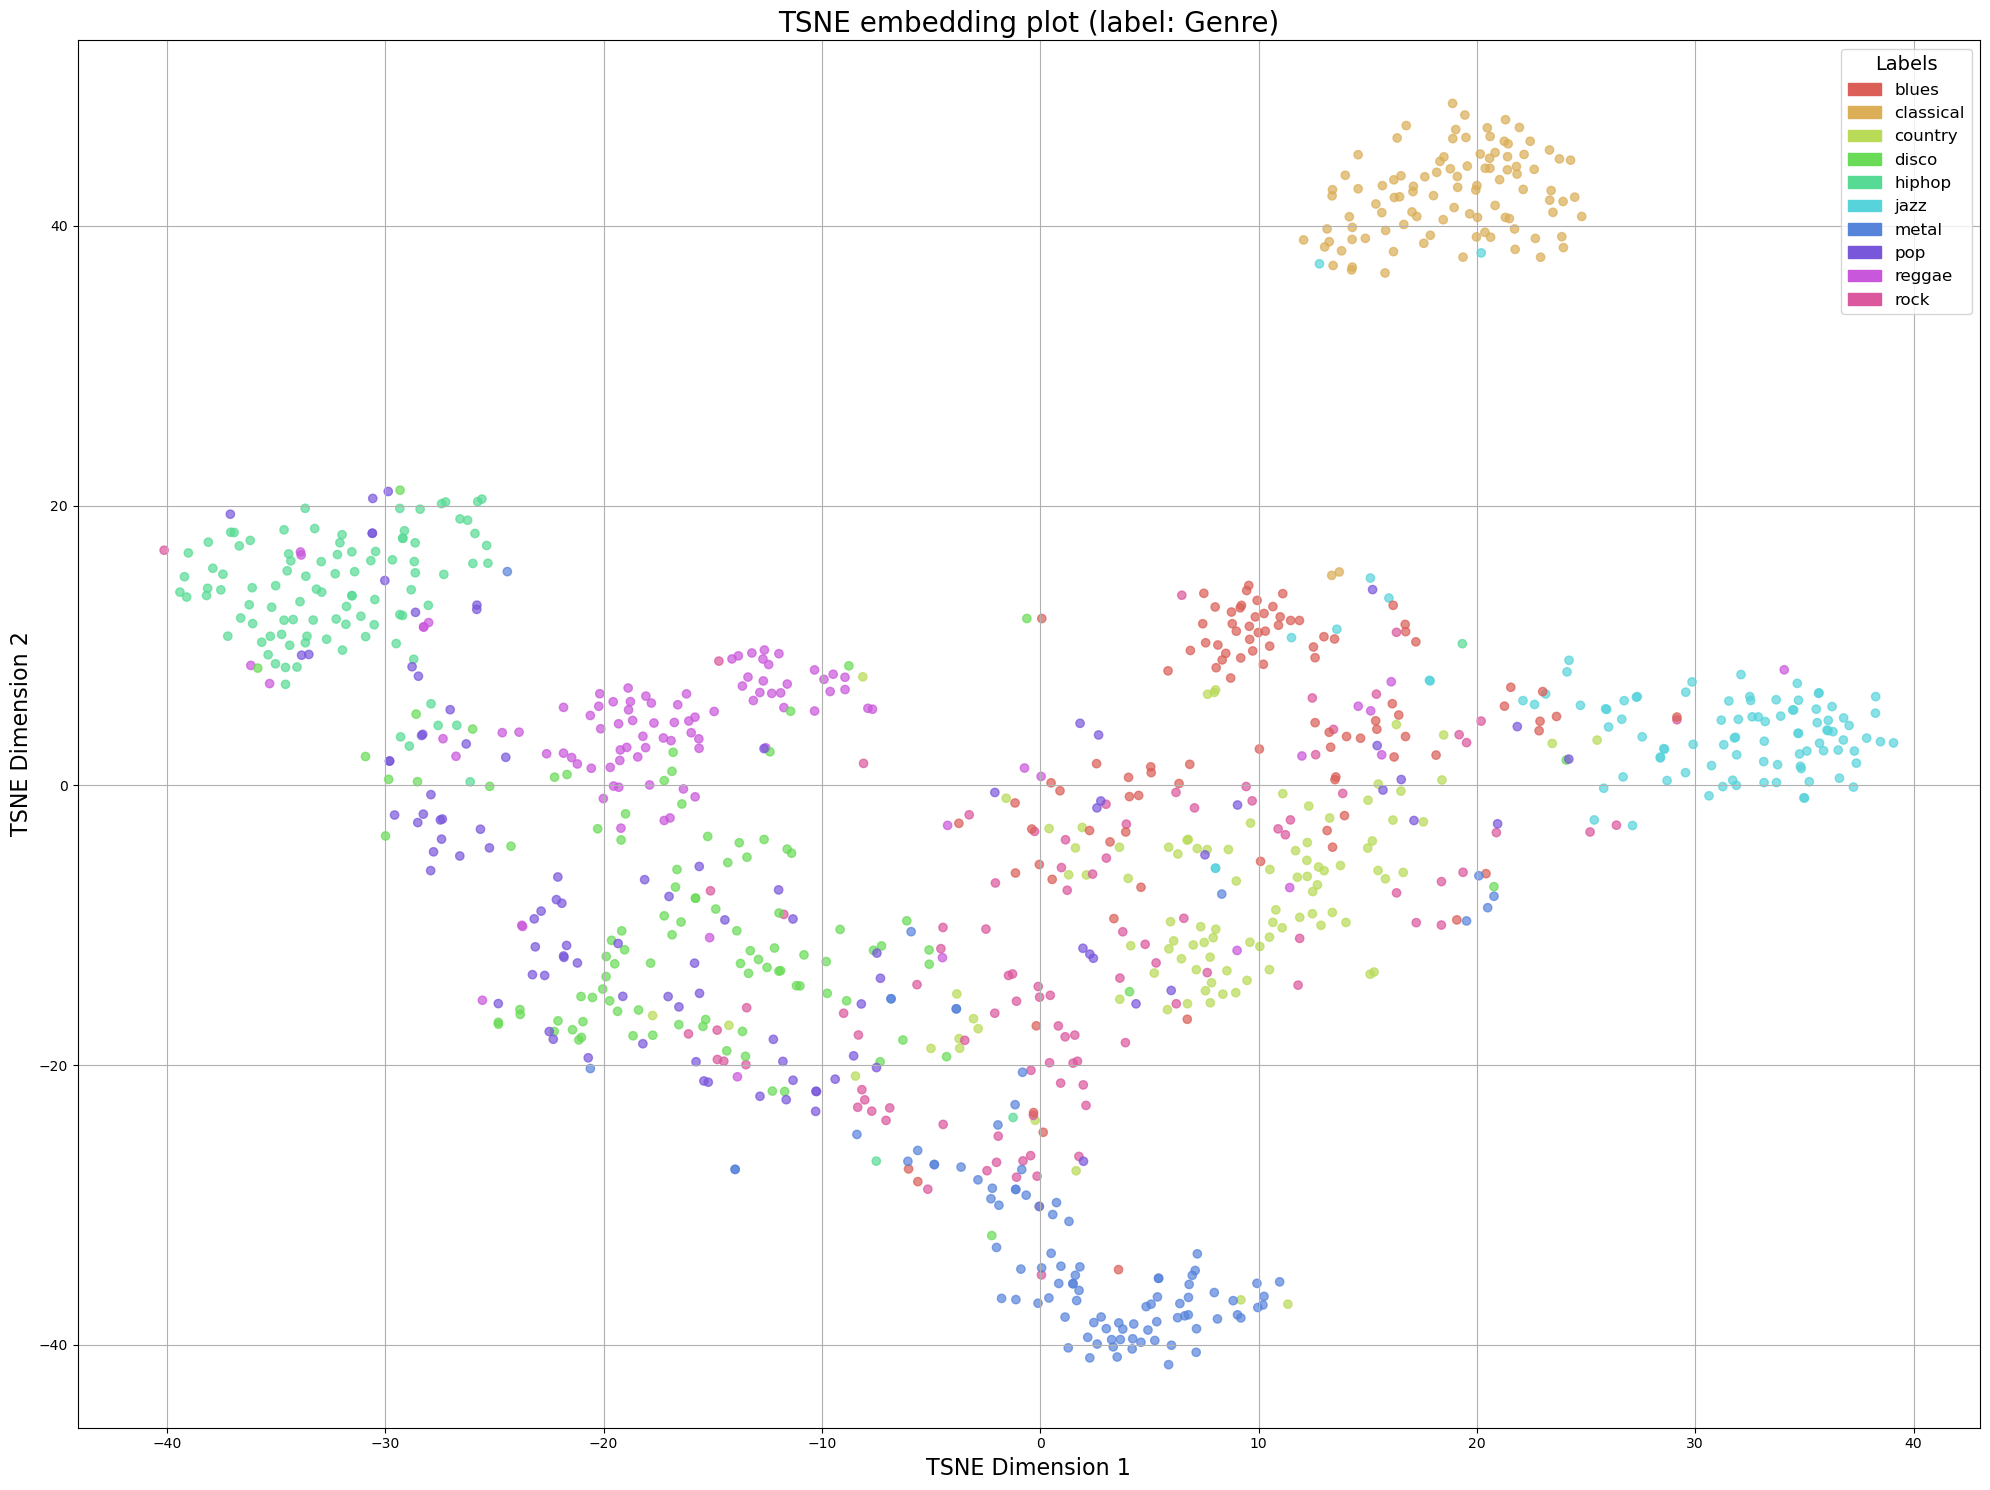

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches

distinct_colors = sns.color_palette("hls", len(unique_labels))

# 각 샘플별로 매핑된 색상을 리스트로 생성
sample_colors = [distinct_colors[label] for label in y_encoded]

plt.figure(figsize=(20, 15))
scatter = plt.scatter(result[:, 0], result[:, 1], c=sample_colors, alpha=0.7)
plt.title("TSNE embedding plot (label: Genre)", fontsize=20)
plt.xlabel("TSNE Dimension 1", fontsize=16)
plt.ylabel("TSNE Dimension 2", fontsize=16)
plt.grid(True)
plt.tight_layout()

# 범례 생성: 각 고유 라벨과 해당 색상을 매핑
patches = [
    mpatches.Patch(color=distinct_colors[i], label=unique_labels[i])
    for i in range(len(unique_labels))
]
plt.legend(handles=patches, title="Labels", loc="best", fontsize=12, title_fontsize=14)

plt.show()

In [5]:
con_df = pd.concat(
    [
        df.loc[:, ["embedding", "genre_or_composer"]],
        df_archive.loc[:, ["embedding", "genre_or_composer"]],
    ]
)

In [6]:
X = np.array(con_df["embedding"].tolist())
y = con_df["genre_or_composer"].values

In [7]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

model = TSNE(n_components=2)
result = model.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
unique_labels = label_encoder.classes_

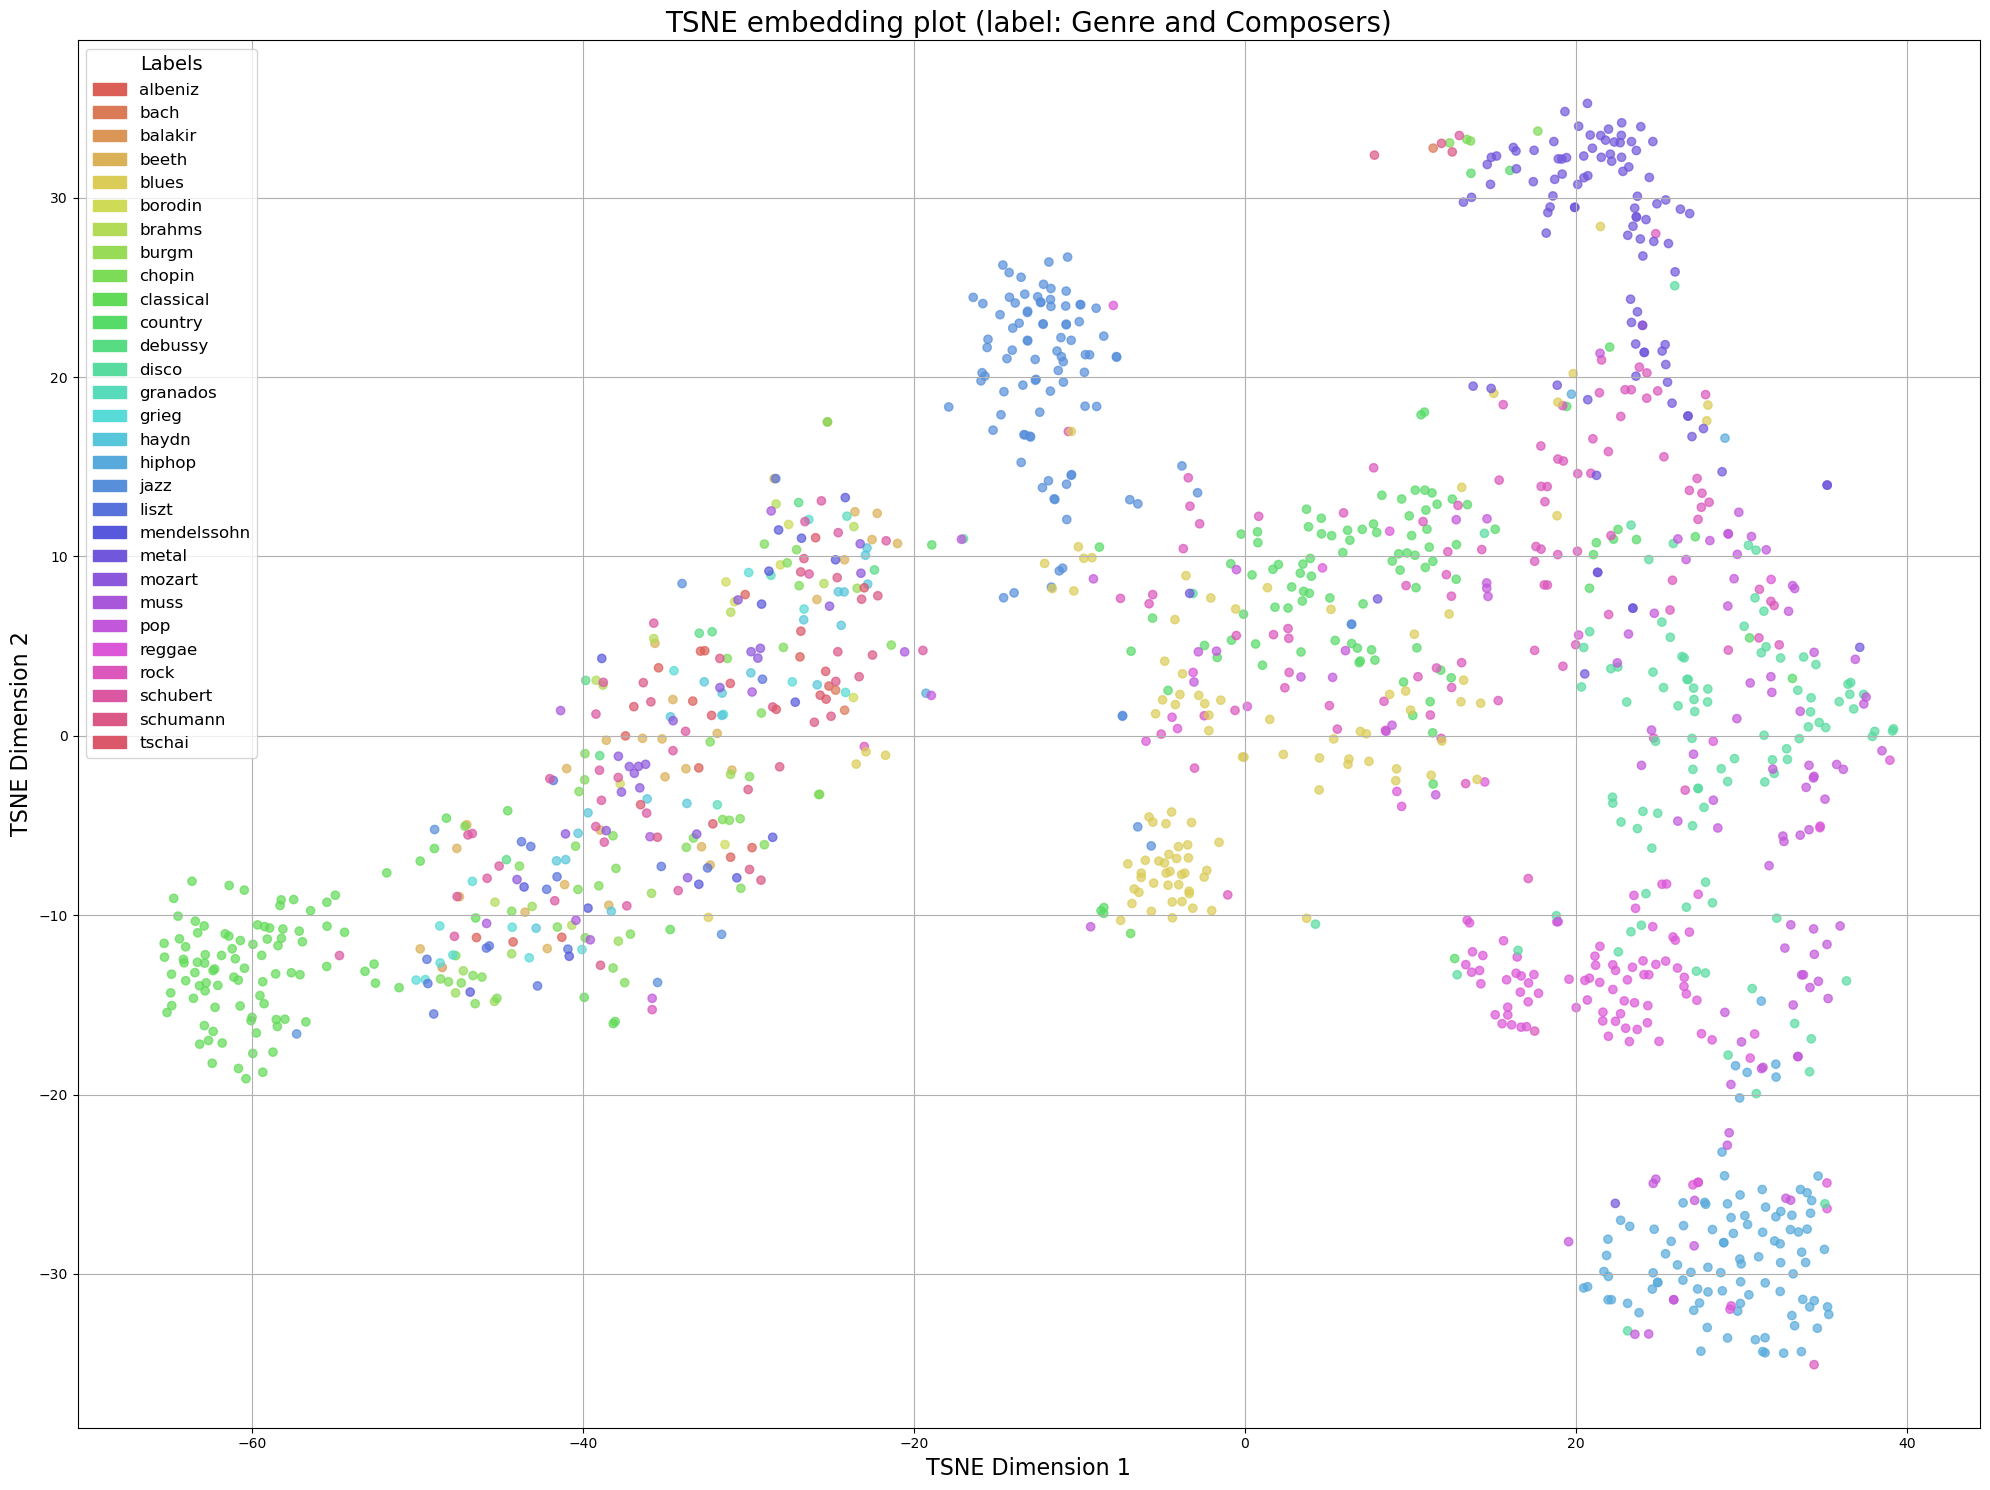

In [9]:
distinct_colors = sns.color_palette("hls", len(unique_labels))

# 각 샘플별로 매핑된 색상을 리스트로 생성
sample_colors = [distinct_colors[label] for label in y_encoded]

plt.figure(figsize=(20, 15))
scatter = plt.scatter(result[:, 0], result[:, 1], c=sample_colors, alpha=0.7)
plt.title("TSNE embedding plot (label: Genre and Composers)", fontsize=20)
plt.xlabel("TSNE Dimension 1", fontsize=16)
plt.ylabel("TSNE Dimension 2", fontsize=16)
plt.grid(True)
plt.tight_layout()

# 범례 생성: 각 고유 라벨과 해당 색상을 매핑
patches = [
    mpatches.Patch(color=distinct_colors[i], label=unique_labels[i])
    for i in range(len(unique_labels))
]
plt.legend(handles=patches, title="Labels", loc="best", fontsize=12, title_fontsize=14)

plt.show()